In [4]:
!cd  ./DeblurGANv2

In [5]:
! pip install -r ./DeblurGANv2/requirements.txt 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.2/29.2 MB 30.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60965 sha256=1d378a6303403784296c45910ea39fcd37cc62952a457245970d4ebbe96b65dc
  Stored in directory: /root/.cache/pip/wheels/ed/27/e8/9543d42de2740d3544db96aefef63bda3f2c1761b3334f4873
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116951 sha256=48f40e81b61ad1d985685e516512ed21d5337c83f34bcf4af739bd454f05e14b
  Stored in directory: /root/.cache/pip/wheels/20/97/e1/dd2c472bebcdcaa85fdc07d0f19020299f1c86773028860c53
  Created 

In [6]:
!cd DeblurGANv2/

In [7]:
import os
 
# Function to Get the current
# working directory
def current_path():
    print("Current working directory before")
    print(os.getcwd())
    print()
 
 
# Driver's code
# Printing CWD before
current_path()
 
# Changing the CWD
os.chdir('./DeblurGANv2')
 
# Printing CWD after
current_path()

Current working directory before
/kaggle/working

Current working directory before
/kaggle/working/DeblurGANv2



In [8]:
!ls

LICENSE			doc_images	     schedulers.py	test_dataset.py
README.md		metric_counter.py    submit		test_img
adversarial_trainer.py	models		     test.py		test_metrics.py
aug.py			picture_to_video.py  test.sh		train.py
config			predict.py	     test_aug.py	util
dataset.py		requirements.txt     test_batchsize.py


## Input Blurry Image

In [9]:
!wget -O blurred-image.jpeg https://pe-images.s3.amazonaws.com/photo-effects/bourne-blur/image-motion-blur.jpg

--2023-12-10 04:44:54--  https://pe-images.s3.amazonaws.com/photo-effects/bourne-blur/image-motion-blur.jpg
Resolving pe-images.s3.amazonaws.com (pe-images.s3.amazonaws.com)... 16.182.64.169, 16.182.105.57, 54.231.159.25, ...
Connecting to pe-images.s3.amazonaws.com (pe-images.s3.amazonaws.com)|16.182.64.169|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38951 (38K) [image/jpeg]
Saving to: ‘blurred-image.jpeg’

blurred-image.jpeg  100%[===================>]  38.04K  --.-KB/s    in 0.08s   

2023-12-10 04:44:55 (448 KB/s) - ‘blurred-image.jpeg’ saved [38951/38951]



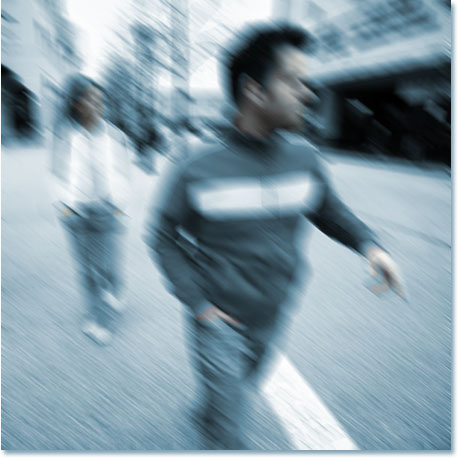

In [10]:
from IPython.display import Image
Image(filename='blurred-image.jpeg') 

In [11]:
!ls 

LICENSE			metric_counter.py    test.sh
README.md		models		     test_aug.py
adversarial_trainer.py	picture_to_video.py  test_batchsize.py
aug.py			predict.py	     test_dataset.py
blurred-image.jpeg	requirements.txt     test_img
config			schedulers.py	     test_metrics.py
dataset.py		submit		     train.py
doc_images		test.py		     util


In [12]:
!wget -O fpn_inception.h5 'https://docs.google.com/uc?export=download&id=1UXcsRVW-6KF23_TNzxw-xC0SzaMfXOaR&confirm=t' #https://drive.google.com/open?id=1UXcsRVW-6KF23_TNzxw-xC0SzaMfXOaR&authuser=0

--2023-12-10 04:44:57--  https://docs.google.com/uc?export=download&id=1UXcsRVW-6KF23_TNzxw-xC0SzaMfXOaR&confirm=t
Resolving docs.google.com (docs.google.com)... 108.177.127.139, 108.177.127.101, 108.177.127.113, ...
Connecting to docs.google.com (docs.google.com)|108.177.127.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-54-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/tddg6q74hs4kke2oalr9ll1mbe6it1fj/1702183425000/12426322494373766467/*/1UXcsRVW-6KF23_TNzxw-xC0SzaMfXOaR?e=download&uuid=33339123-4b7d-4d8b-8fc7-59d9a28c8c55 [following]
--2023-12-10 04:44:57--  https://doc-10-54-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/tddg6q74hs4kke2oalr9ll1mbe6it1fj/1702183425000/12426322494373766467/*/1UXcsRVW-6KF23_TNzxw-xC0SzaMfXOaR?e=download&uuid=33339123-4b7d-4d8b-8fc7-59d9a28c8c55
Resolving doc-10-54-docs.googleusercontent.com (doc-10-54-docs.googleusercontent.com)... 173.194.69.1

In [13]:
!ls

LICENSE			doc_images	     schedulers.py	test_img
README.md		fpn_inception.h5     submit		test_metrics.py
adversarial_trainer.py	metric_counter.py    test.py		train.py
aug.py			models		     test.sh		util
blurred-image.jpeg	picture_to_video.py  test_aug.py
config			predict.py	     test_batchsize.py
dataset.py		requirements.txt     test_dataset.py


In [14]:
! python predict.py blurry-image.jpg

In [15]:
!ls submit/

000001.png  000019.png	000201.png


In [16]:
%%writefile predict1.py

import os
from glob import glob
from typing import Optional

import cv2
import numpy as np
import torch
import yaml
from fire import Fire
from tqdm import tqdm

from aug import get_normalize
from models.networks import get_generator


class Predictor:
    def __init__(self, weights_path: str, model_name: str = ''):
        with open('config/config.yaml',encoding='utf-8') as cfg:
            config = yaml.load(cfg, Loader=yaml.FullLoader)
        model = get_generator(model_name or config['model'])
        model.load_state_dict(torch.load(weights_path)['model'])
        self.model = model.cuda()
        self.model.train(True)
        # GAN inference should be in train mode to use actual stats in norm layers,
        # it's not a bug
        self.normalize_fn = get_normalize()

    @staticmethod
    def _array_to_batch(x):
        x = np.transpose(x, (2, 0, 1))
        x = np.expand_dims(x, 0)
        return torch.from_numpy(x)

    def _preprocess(self, x: np.ndarray, mask: Optional[np.ndarray]):
        x, _ = self.normalize_fn(x, x)
        if mask is None:
            mask = np.ones_like(x, dtype=np.float32)
        else:
            mask = np.round(mask.astype('float32') / 255)

        h, w, _ = x.shape
        block_size = 32
        min_height = (h // block_size + 1) * block_size
        min_width = (w // block_size + 1) * block_size

        pad_params = {'mode': 'constant',
                      'constant_values': 0,
                      'pad_width': ((0, min_height - h), (0, min_width - w), (0, 0))
                      }
        x = np.pad(x, **pad_params)
        mask = np.pad(mask, **pad_params)

        return map(self._array_to_batch, (x, mask)), h, w

    @staticmethod
    def _postprocess(x: torch.Tensor) -> np.ndarray:
        x, = x
        x = x.detach().cpu().float().numpy()
        x = (np.transpose(x, (1, 2, 0)) + 1) / 2.0 * 255.0
        return x.astype('uint8')

    def __call__(self, img: np.ndarray, mask: Optional[np.ndarray], ignore_mask=True) -> np.ndarray:
        (img, mask), h, w = self._preprocess(img, mask)
        with torch.no_grad():
            inputs = [img.cuda()]
            if not ignore_mask:
                inputs += [mask]
            pred = self.model(*inputs)
        return self._postprocess(pred)[:h, :w, :]

def process_video(pairs, predictor, output_dir):
    for video_filepath, mask in tqdm(pairs):
        video_filename = os.path.basename(video_filepath)
        output_filepath = os.path.join(output_dir, os.path.splitext(video_filename)[0]+'_deblur.mp4')
        video_in = cv2.VideoCapture(video_filepath)
        fps = video_in.get(cv2.CAP_PROP_FPS)
        width = int(video_in.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(video_in.get(cv2.CAP_PROP_FRAME_HEIGHT))
        total_frame_num = int(video_in.get(cv2.CAP_PROP_FRAME_COUNT))
        video_out = cv2.VideoWriter(output_filepath, cv2.VideoWriter_fourcc(*'MP4V'), fps, (width, height))
        tqdm.write(f'process {video_filepath} to {output_filepath}, {fps}fps, resolution: {width}x{height}')
        for frame_num in tqdm(range(total_frame_num), desc=video_filename):
            res, img = video_in.read()
            if not res:
                break
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            pred = predictor(img, mask)
            pred = cv2.cvtColor(pred, cv2.COLOR_RGB2BGR)
            video_out.write(pred)

def main(img_pattern: str,
         mask_pattern: Optional[str] = None,
         weights_path='fpn_inception.h5',
         out_dir='submit/',
         side_by_side: bool = False,
         video: bool = False):
    def sorted_glob(pattern):
        return sorted(glob(pattern))

    imgs = sorted_glob(img_pattern)
    masks = sorted_glob(mask_pattern) if mask_pattern is not None else [None for _ in imgs]
    pairs = zip(imgs, masks)
    names = sorted([os.path.basename(x) for x in glob(img_pattern)])
    predictor = Predictor(weights_path=weights_path)

    os.makedirs(out_dir, exist_ok=True)
    if not video:
        for name, pair in tqdm(zip(names, pairs), total=len(names)):
            f_img, f_mask = pair
            img, mask = map(cv2.imread, (f_img, f_mask))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            pred = predictor(img, mask)
            if side_by_side:
                pred = np.hstack((img, pred))
            pred = cv2.cvtColor(pred, cv2.COLOR_RGB2BGR)
            cv2.imwrite(os.path.join(out_dir, name),
                        pred)
    else:
        process_video(pairs, predictor, out_dir)

# def getfiles():
#     filenames = os.listdir(r'.\dataset1\blur')
#     print(filenames)
def get_files():
    list=[]
    for filepath,dirnames,filenames in os.walk(r'.\dataset1\blur'):
        for filename in filenames:
            list.append(os.path.join(filepath,filename))
    return list





if __name__ == '__main__':
  #  Fire(main)
#增加批量处理图片：
#     img_path=get_files()
#     for i in img_path:
#         main(i)
    main('blurred-image.jpeg')

Writing predict1.py


In [17]:
!ls

LICENSE			fpn_inception.h5     test.py
README.md		metric_counter.py    test.sh
__pycache__		models		     test_aug.py
adversarial_trainer.py	picture_to_video.py  test_batchsize.py
aug.py			predict.py	     test_dataset.py
blurred-image.jpeg	predict1.py	     test_img
config			requirements.txt     test_metrics.py
dataset.py		schedulers.py	     train.py
doc_images		submit		     util


In [18]:
!wget -O inceptionresnetv2-520b38e4.pth http://data.lip6.fr/cadene/pretrainedmodels/inceptionresnetv2-520b38e4.pth --no-check-certificate

--2023-12-10 04:45:11--  http://data.lip6.fr/cadene/pretrainedmodels/inceptionresnetv2-520b38e4.pth
Resolving data.lip6.fr (data.lip6.fr)... 132.227.201.10
Connecting to data.lip6.fr (data.lip6.fr)|132.227.201.10|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://data.lip6.fr/cadene/pretrainedmodels/inceptionresnetv2-520b38e4.pth [following]
--2023-12-10 04:45:11--  https://data.lip6.fr/cadene/pretrainedmodels/inceptionresnetv2-520b38e4.pth
Connecting to data.lip6.fr (data.lip6.fr)|132.227.201.10|:443... connected.
  Issued certificate has expired.
HTTP request sent, awaiting response... 200 OK
Length: 223774246 (213M) [application/octet-stream]
Saving to: ‘inceptionresnetv2-520b38e4.pth’

inceptionresnetv2-5 100%[===================>] 213.41M   363KB/s    in 10m 28s 

2023-12-10 04:55:39 (348 KB/s) - ‘inceptionresnetv2-520b38e4.pth’ saved [223774246/223774246]



In [24]:
! cp inceptionresnetv2-520b38e4.pth /root/.cache/torch/hub/checkpoints/

In [25]:
! python predict1.py blurred-image.jpeg

  0%|                                                     | 0/1 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:3704: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
100%|█████████████████████████████████████████████| 1/1 [00:05<00:00,  5.15s/it]


In [26]:
!ls submit/

000001.png  000019.png	000201.png  blurred-image.jpeg


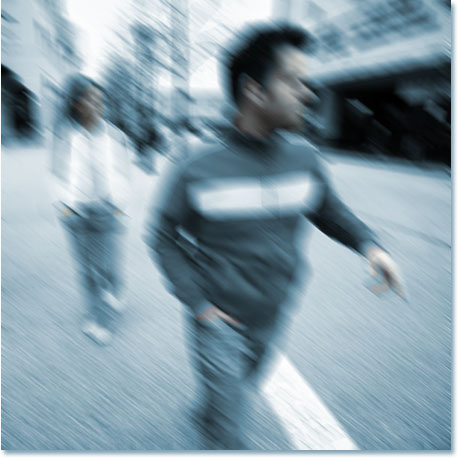

In [27]:
from IPython.display import Image
Image(filename='blurred-image.jpeg') 

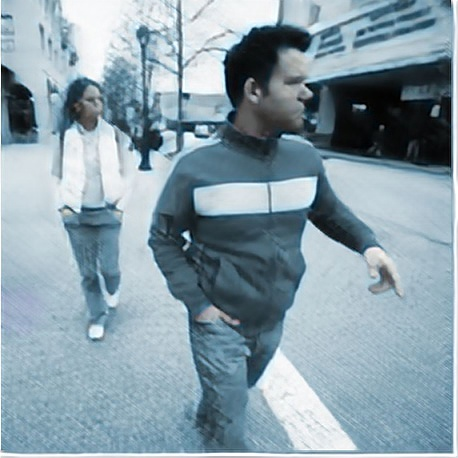

In [28]:
from IPython.display import Image
Image(filename='submit/blurred-image.jpeg') 